In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('student_sleep_patterns.csv')
df.head(10)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51
6,7,22,Female,2nd Year,6.5,11.7,3.4,1,99,6,13.05,20.96,8.58,10.81
7,8,22,Male,2nd Year,6.1,7.8,3.0,1,108,4,10.49,10.85,5.60,10.02
8,9,24,Female,1st Year,8.6,2.4,1.4,1,86,7,11.06,18.88,8.14,8.78
9,10,19,Other,2nd Year,5.8,8.2,2.0,3,44,8,14.65,5.31,7.47,9.37


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [52]:
print(df)

     Student_ID  Age  Gender University_Year  Sleep_Duration  Study_Hours  \
0             1   24   Other        2nd Year             7.7          7.9   
1             2   21    Male        1st Year             6.3          6.0   
2             3   22    Male        4th Year             5.1          6.7   
3             4   24   Other        4th Year             6.3          8.6   
4             5   20    Male        4th Year             4.7          2.7   
..          ...  ...     ...             ...             ...          ...   
495         496   24    Male        2nd Year             5.1          9.3   
496         497   20    Male        2nd Year             8.9          7.7   
497         498   21    Male        3rd Year             5.7          6.4   
498         499   18  Female        2nd Year             4.9          0.5   
499         500   21    Male        3rd Year             7.9         11.6   

     Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0   

In [53]:
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import OneHotEncoder as oe

In [54]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
University_Year,0
Sleep_Duration,0
Study_Hours,0
Screen_Time,0
Caffeine_Intake,0
Physical_Activity,0
Sleep_Quality,0


In [55]:
#encoding atribut gender dan univeristy year
df['Gender'] = le().fit_transform(df['Gender'])
df['University_Year'] = le().fit_transform(df['University_Year'])

# merubah sleep_start dan sleep_end menjadi format 24 jam
def convert_time_to_minutes(time):
    hours = int(time)
    minutes = (time - hours) * 60
    return hours * 60 + minutes

df['Weekday_Sleep_Start'] = df['Weekday_Sleep_Start'].apply(convert_time_to_minutes)
df['Weekday_Sleep_End'] = df['Weekday_Sleep_End'].apply(convert_time_to_minutes)
df['Weekend_Sleep_End'] = df['Weekend_Sleep_End'].apply(convert_time_to_minutes)
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,1,7.7,7.9,3.4,2,37,10,849.6,4.05,444.6,423.6
1,2,21,1,0,6.3,6.0,1.9,5,74,2,523.8,7.10,492.6,612.6
2,3,22,1,3,5.1,6.7,3.9,5,53,5,1200.0,20.47,412.8,655.2
3,4,24,2,3,6.3,8.6,2.8,4,55,9,1189.2,4.08,401.4,565.2
4,5,20,1,3,4.7,2.7,2.7,0,85,3,1258.8,6.12,538.8,540.6


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    int64  
 3   University_Year      500 non-null    int64  
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 54.8 KB


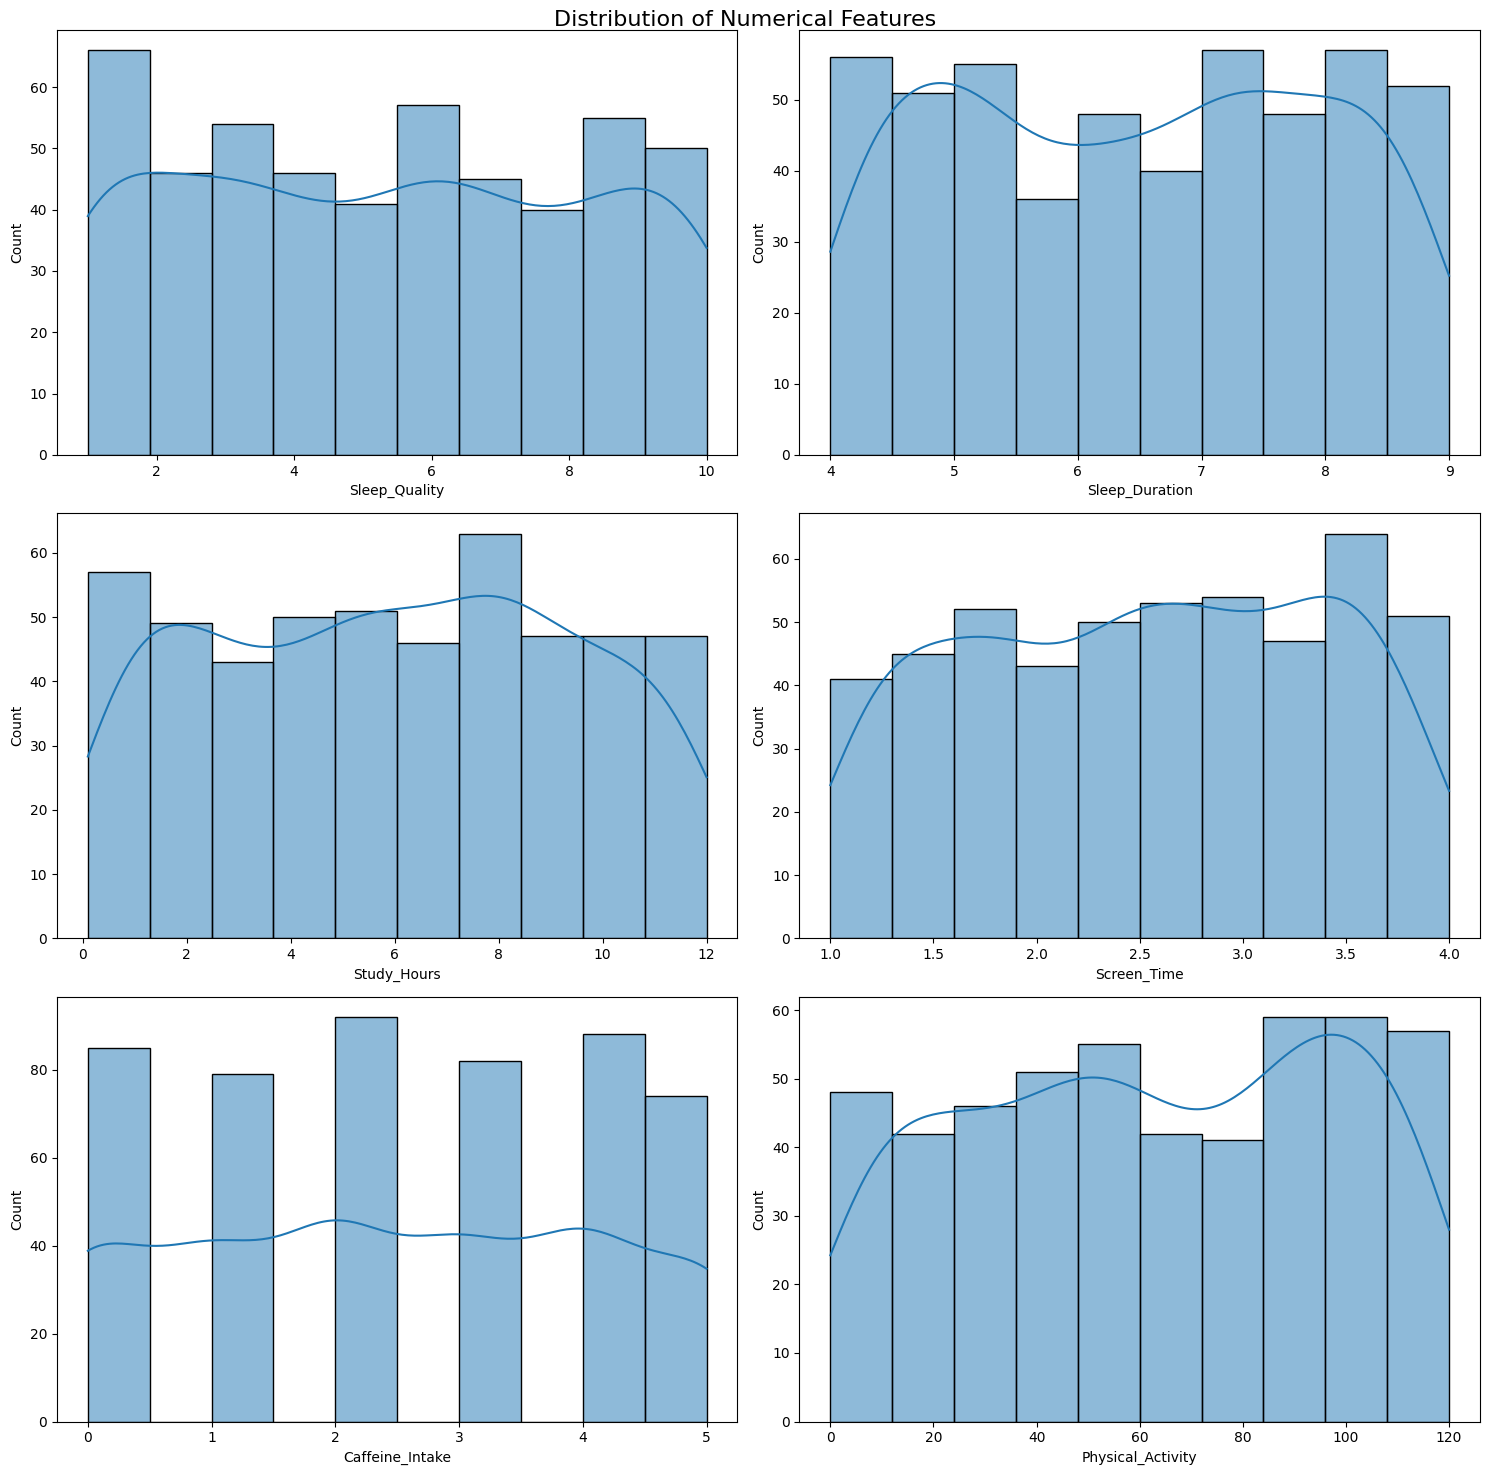

In [57]:
# Plotting distribution of numerical features
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df['Sleep_Duration'], ax=axes[0, 1], kde=True)
sns.histplot(df['Study_Hours'], ax=axes[1, 0], kde=True)
sns.histplot(df['Screen_Time'], ax=axes[1, 1], kde=True)
sns.histplot(df['Caffeine_Intake'], ax=axes[2, 0], kde=True)
sns.histplot(df['Physical_Activity'], ax=axes[2, 1], kde=True)
sns.histplot(df['Sleep_Quality'], ax=axes[0, 0], kde=True)

fig.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

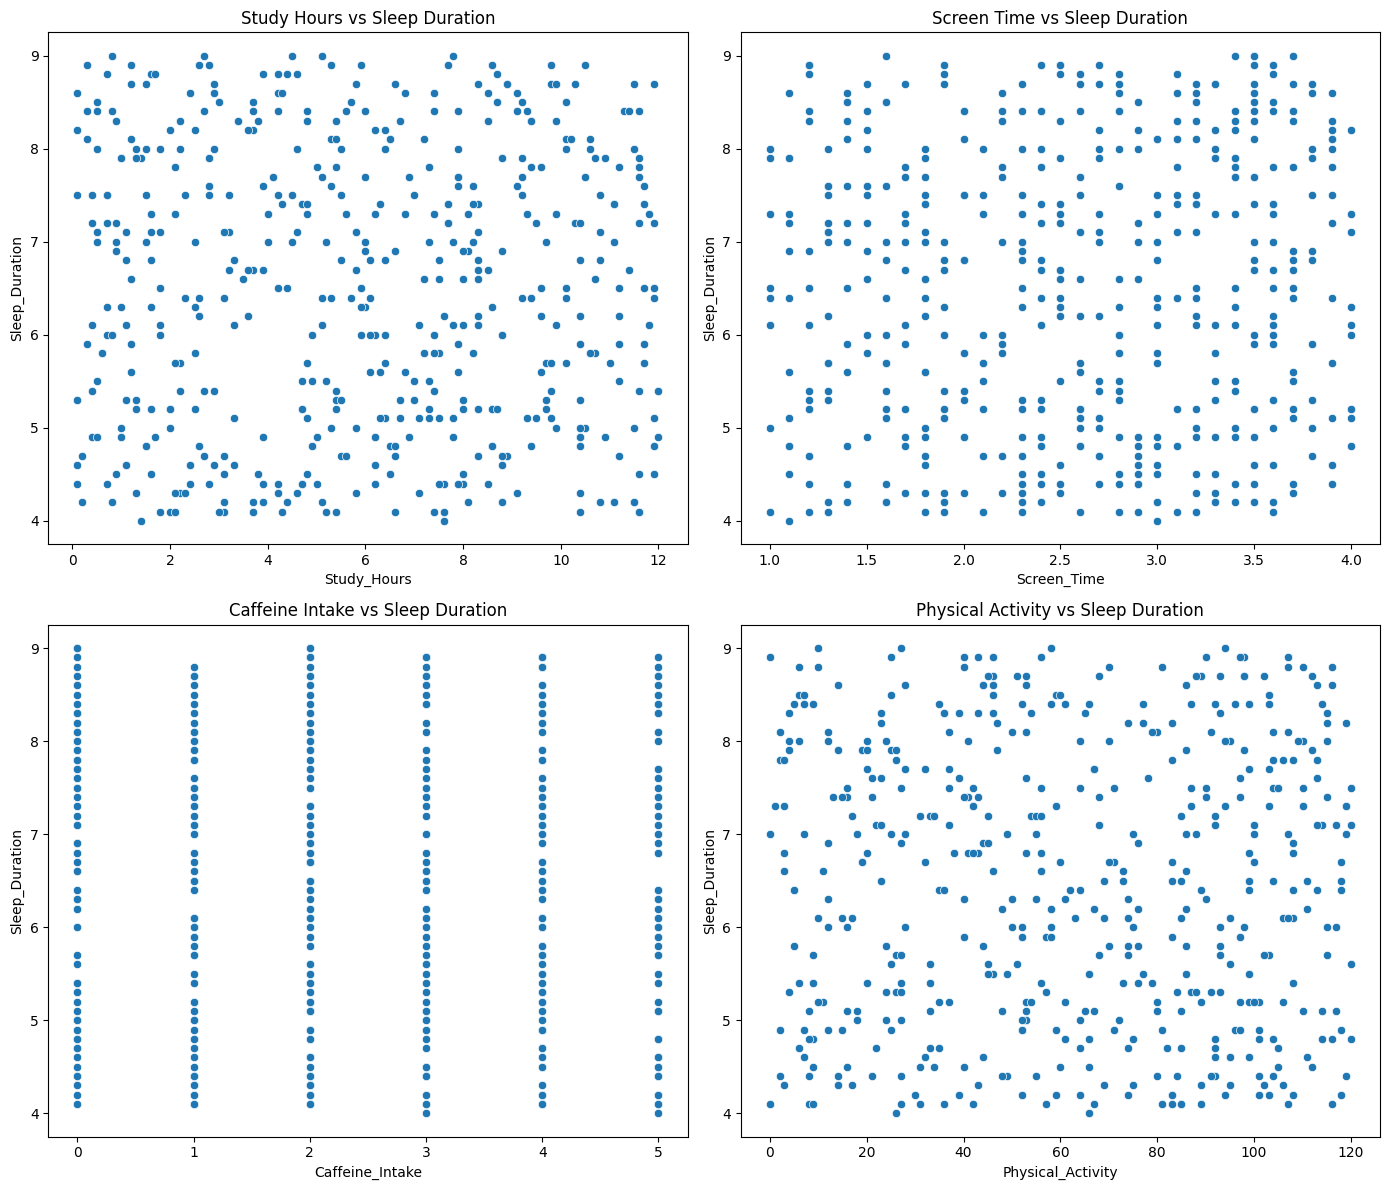

In [58]:
#hubungan Sleep_Duration dengan variable lainnya
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.scatterplot(x='Study_Hours', y='Sleep_Duration', data=df, ax=axes[0, 0])
sns.scatterplot(x='Screen_Time', y='Sleep_Duration', data=df, ax=axes[0, 1])
sns.scatterplot(x='Caffeine_Intake', y='Sleep_Duration', data=df, ax=axes[1, 0])
sns.scatterplot(x='Physical_Activity', y='Sleep_Duration', data=df, ax=axes[1, 1])

axes[0, 0].set_title('Study Hours vs Sleep Duration')
axes[0, 1].set_title('Screen Time vs Sleep Duration')
axes[1, 0].set_title('Caffeine Intake vs Sleep Duration')
axes[1, 1].set_title('Physical Activity vs Sleep Duration')

plt.tight_layout()
plt.show()

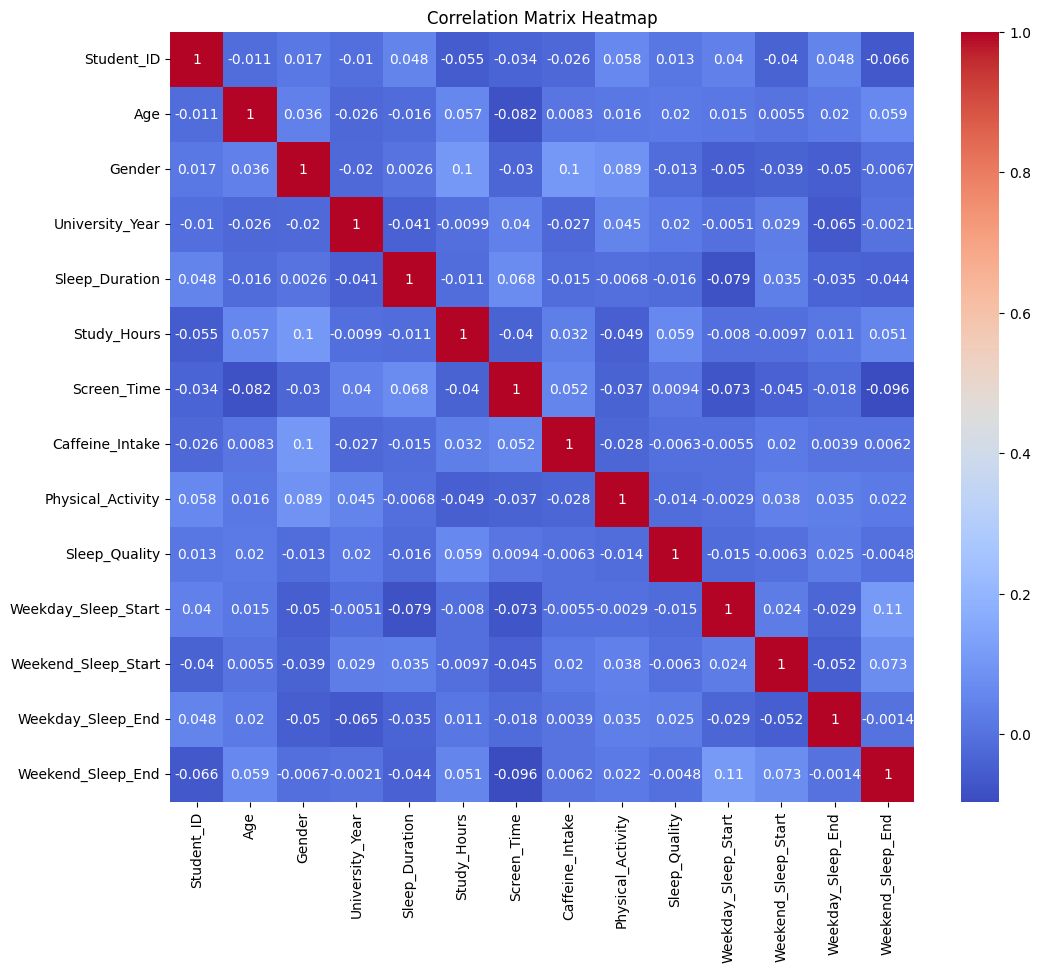

In [59]:
correlation_matrix = df.corr()

# Visualisasi Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [60]:
X = df.drop(['Sleep_Quality'], axis=1)
y = df['Sleep_Quality']

In [61]:
!pip install --quiet optuna
!pip install catboost
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer

In [62]:
numerical_cols = ['Weekday_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity']
categorical_cols = ['Gender', 'University_Year']

In [63]:
X_numerical = X[numerical_cols]
X_categorical = X[categorical_cols]

In [64]:
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

In [65]:
X_final = pd.concat([X_numerical, X_categorical_encoded], axis=1)

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [72]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),  # Ganti dengan suggest_float(log=True)
        'depth': trial.suggest_int('depth', 4, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'loss_function': 'MultiClass',
        'eval_metric': 'Accuracy',
        'logging_level': 'Silent',
        'random_seed': 42,  # Pastikan untuk mengganti SEED dengan nilai konkret jika belum didefinisikan
    }
    model = CatBoostClassifier(**params)

    # Melatih model
    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=0, early_stopping_rounds=50)

    # Prediksi dan evaluasi
    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)

    return accuracy


In [73]:
print(y.unique())
print(y.value_counts())


[10  2  5  9  3  6  4  7  8  1]
Sleep_Quality
1     66
6     57
9     55
3     54
10    50
2     46
4     46
7     45
5     41
8     40
Name: count, dtype: int64


In [74]:
# Optimasi menggunakan Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Tampilkan parameter terbaik
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-25 18:08:30,922] A new study created in memory with name: no-name-850e70f4-cef5-4a71-87de-9b2b38abc31a
[I 2024-11-25 18:08:31,383] Trial 0 finished with value: 0.13 and parameters: {'iterations': 880, 'learning_rate': 0.0012564251111441592, 'depth': 7, 'l2_leaf_reg': 6.782938780977635, 'bagging_temperature': 0.9580766063063875, 'random_strength': 0.6951187804744188, 'border_count': 73}. Best is trial 0 with value: 0.13.
[I 2024-11-25 18:08:38,607] Trial 1 finished with value: 0.13 and parameters: {'iterations': 641, 'learning_rate': 0.01868850123400614, 'depth': 10, 'l2_leaf_reg': 3.593541529358649, 'bagging_temperature': 0.42896220232124527, 'random_strength': 0.7968012117626958, 'border_count': 128}. Best is trial 0 with value: 0.13.
[I 2024-11-25 18:08:39,460] Trial 2 finished with value: 0.13 and parameters: {'iterations': 752, 'learning_rate': 0.12008300081508344, 'depth': 8, 'l2_leaf_reg': 3.2174367613035515, 'bagging_temperature': 0.46949686258997303, 'random_strength

Best parameters: {'iterations': 528, 'learning_rate': 0.0027695194417617034, 'depth': 11, 'l2_leaf_reg': 3.99456008846453, 'bagging_temperature': 0.1959444443885189, 'random_strength': 0.21089182965987674, 'border_count': 78}
Best accuracy: 0.23


In [77]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [78]:
print("Columns in X_train but not in X_test:", set(X_train.columns) - set(X_test.columns))
print("Columns in X_test but not in X_train:", set(X_test.columns) - set(X_train.columns))


Columns in X_train but not in X_test: set()
Columns in X_test but not in X_train: set()


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.15

Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.17      0.24        23
           2       0.14      0.07      0.09        15
           3       0.33      0.06      0.10        18
           4       0.67      0.14      0.24        14
           5       0.50      0.08      0.14        12
           6       0.00      0.00      0.00        14
           7       0.22      0.15      0.18        13
           8       0.00      0.00      0.00        12
           9       0.09      0.75      0.16        12
          10       0.25      0.18      0.21        17

    accuracy                           0.15       150
   macro avg       0.26      0.16      0.13       150
weighted avg       0.27      0.15      0.14       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
